# Fazer uma análise exploratória dos dados de vendas de um supermercado entre 2015 e 2018 através do aplicativo

### O gerente solicitou um levantamento dos dados de vendas para saber os locais onde mais vende, se o desconto afeta na quantidade de vendas, se as vendas cresceram ou diminuiram com o tempo e quais os produtos que mais saem

In [84]:
#Ler o csv e mostrar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_vendas = pd.read_csv("dados supermercado.csv")
display(df_vendas)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [85]:
#Verificar tipos, nulos e eliminar dados desnecessários
df_vendas.dtypes
df_vendas.isna().sum()

df_vendas = df_vendas.drop(columns=['Order ID', 'Customer Name'])

In [86]:
#As vendas são feitas em apenas um estado, então não há necessidade da coluna estado também
df_vendas['State'].value_counts()
df_vendas = df_vendas.drop(columns='State')

In [87]:
#Formatar as datas que estavam com '/' no lugar de '-'
dia_noformat = (df_vendas['Order Date'].str[1] == '/')
dia2_noformat = (df_vendas['Order Date'].str[2] == '/')

df_vendas.loc[dia_noformat, 'Order Date'] = df_vendas.loc[dia_noformat, 'Order Date'].str.replace('/', '-')
df_vendas.loc[dia2_noformat, 'Order Date'] = df_vendas.loc[dia2_noformat, 'Order Date'].str.replace('/', '-')

In [88]:
#Transformar em data
df_vendas['Order Date'] = pd.to_datetime(df_vendas['Order Date'])

In [89]:
#Separar mes e ano
df_vendas['Order Year'] = df_vendas['Order Date'].dt.year
df_vendas['Order Month'] = df_vendas['Order Date'].dt.month
df_vendas['Order Day'] = df_vendas['Order Date'].dt.day

#Dropar coluna da data inteira
df_vendas = df_vendas.drop(columns='Order Date')

In [92]:
df_vendas.dtypes

Category         object
Sub Category     object
City             object
Region           object
Sales             int64
Discount        float64
Profit          float64
Order Year        int32
Order Month       int32
Order Day         int32
dtype: object

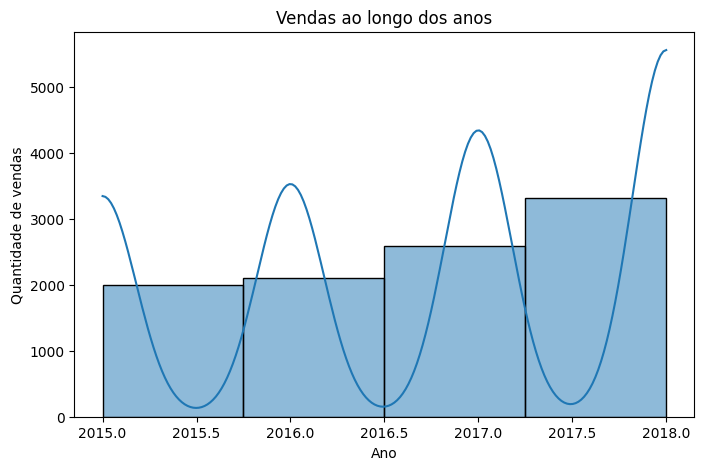

In [97]:
#Verificar a variação das vendas ao longo dos anos
plt.figure(figsize=(8,5))
sns.histplot(df_vendas['Order Year'], bins=4, kde=True)
plt.title('Vendas ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de vendas')
plt.show()

In [91]:
#Verificar quais regiões compram mais e quais cidades também